# Intro to Cameras

In this tutorial, we will cover the basics of taking a photo using a USB webcam connected to your PYNQ Board; and displaying, manuipulating and saving that photo. This can be used to interpret many kinds of data such as images of people or objects (covered in the computer vision breakout session) or to read in other information such as barcodes and numbers.

### Step 1: Connect you USB webcam to your PYNQ Board

<img src="data/itc_setup.png" height="30%" width="30%" />


**Note:** If you are using Wifi for internet connectivity, please ask the onsite staff for help.

### Step 2: Load Overlay
Our PYNQ Board has a Field Programmable Gate Array (FPGA) on it that must be programmed before we begin using the board. We apply designs called overlays that we can design however we want. For the first part of this tutorial, we are going to use the pre-built base overlay.

To put it simply, we need to setup the board so that is configured to use the camera connected to the USB port.

In [1]:
from pynq.overlays.base import BaseOverlay
from pynq.lib.video import *
base = BaseOverlay("base.bit")

### Step 3: Import Stuff We Need
Here we tell the board what libraries we want to use in our project. This will allow us to use the camera and manipulate the images without having to write all the low-level apsects of handling the camera ourselves.

In [ ]:
import cv2
from matplotlib.image import imsave
from matplotlib import pyplot as plt
import numpy as np
from IPython import display

### Step 4: Initialize Webcam
After plugging in our USB webcam, we must tell the board what size images it is going to be recording and sending to the board. We also need to create a python object that will store the images we read from the webcam.

**Note:** If you have experience with Python, please feel free to dive into the functions below and see how it works. If you don't, feel free to skip to the next section.

In [ ]:
# Remember this, we'll use this later.
frame_width = 640
frame_height = 480

In [1]:
def initialize_webcam(camera_num, frame_width, frame_height):
    """Initialize the webcam.
    Args:
        camera_num (int): Camera number.
        frame_width (int): The width of the frame.
        frame_height (int): The height of the frame.
    Returns:
        VideoCapture: The video capture object.
    """
    # Initialize the video capture object.
    cap = cv2.VideoCapture(camera_num)
    # Set the resolution.
    cap.set(cv2.CAP_PROP_FRAME_WIDTH, frame_width)
    cap.set(cv2.CAP_PROP_FRAME_HEIGHT, frame_height)
    return cap

In [ ]:
def is_camera_ready(cap):
    """Check if the camera is ready.
    Args:
        cap (VideoCapture): The video capture object.
    Returns:
        bool: True if the camera is ready, False otherwise.
    """
    # Check if the camera is ready.
    if not cap.isOpened():
        return False
    return True

In [67]:
cap = initialize_webcam(camera_num=0, frame_width=frame_width, frame_height=frame_height)

print("Camera is ready" if is_camera_ready(cap) else "Error starting camera.")

camera is ready


#### Troubleshooting 

1. Try re-running the cell again.
2. Try unplugging and replugging your USB webcam. And then try re-running the notebook again.


### Step 5: Take Photo
Once we have our board setup and webcam working, it is time to use it! using cap.read(), we can read what the webcam is looking at at any given moment. This function has two return values. The first tells us if we successfully read an image or not. True means we did, false means there was a problem. The second return value is a frame object, which is the actual image we read.

Videos are made of frames. Think of a video as a series of frames. Each frame is a single image.
So to take photo, we will capture the first frame of the video.

**Note:** If you have experience with Python, please feel free to dive into the functions below and see how it works. If you don't, feel free to skip to the next section.

In [ ]:
def get_frame(cap):
    """Take a photo.
    Args:
        cap (VideoCapture): The video capture object.
    Returns:
        numpy.ndarray: The frame/image.
    """
    # Take a photo.
    ret, frame = cap.read()
    if not ret:
        print("Error reading frame.")
        return None
    return frame[:,:,[2,1,0]]

In [68]:
frame = get_frame(cap)

### Troubleshooting

1. Try re-running the initialization cell again, and then come back and run the `get_frame` cell.

### Step 6: Display Photo

Using matplotlib imported earlier, we can display our image right in our Jupyter notebook

In [ ]:
def show_image(image):
    """Show an image.
    Args:
        img (numpy.ndarray): The image.
    """
    # Show the image.
    plt.imshow(image)
    plt.show()

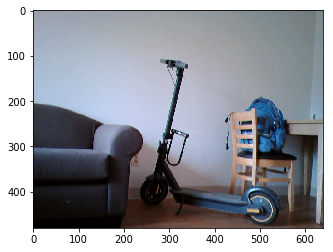

In [69]:
show_image(image=frame)

### Step 7: Apply Various Transformations to Photo

Try out filtering and cropping operations available in numpy and opencv

#### Blur the Image

#### Default Blur (Average Blur)

In [ ]:
blurred_image_1 = cv2.blur(frame, (5,5))

Display the image

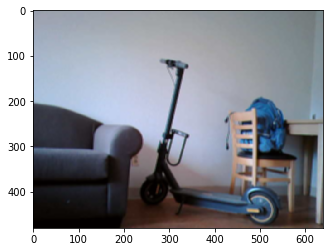

In [70]:
show_image(image=blurred_image_1)


#### Box Blur


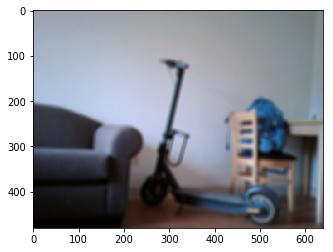

In [71]:
blurred_image_2 = cv2.boxFilter(frame, -1, (10, 10), normalize=True)

show_image(image=blurred_image_2)

#### Stack image side-by-side

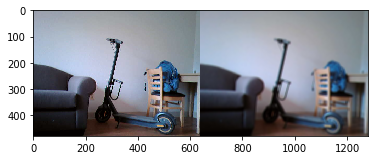

In [72]:
horizontally_stacked_image = np.hstack((frame, blurred_image_1, blurred_image_2))

show_image(image=horizontally_stacked_image)

#### Detect edges in an image

**Note:** If you have experience with Python, please feel free to dive into the functions below and see how it works. If you don't, feel free to skip to the next section.

In [ ]:
def detect_edges(image):

    # Edge detection filters
    scale = 1
    delta = 0

    # The depth of the output image. We set it to CV_16S to avoid overflow
    ddepth = cv2.CV_16S

    # Remove noise by blurring with a Gaussian filter ( kernel size = 3 )
    src = cv2.GaussianBlur(image, (3, 3), 0)

    # Convert the image to grayscale
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    # Gradient-X
    # Order of derivative is 1 in X direction
    grad_x = cv2.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale,
                    delta=delta, borderType=cv2.BORDER_DEFAULT)

    # Gradient-Y
    # Order of derivative is 1 in Y direction
    # Scharr gives stronger edges as compared to Sobel
    grad_y = cv2.Scharr(gray, ddepth, 0, 1)
    #grad_y = cv2.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv2.BORDER_DEFAULT)

    # Combine X and Y edge components
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    return grad


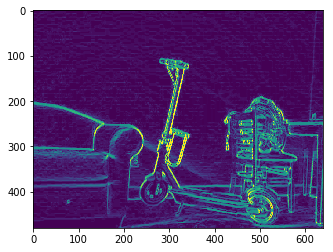

In [73]:
edge_detected_image = detect_edges(frame)

show_image(image=edge_detected_image)

#### Flip image

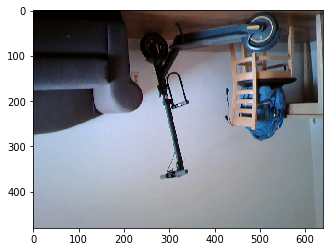

In [74]:
horizontally_flipped_image = np.flip(frame, axis=0)

show_image(image=horizontally_flipped_image)


#### Show RGB components of image

![](data/rgb.jpeg)

Functions to extract red, green, and blue components of an image are available in numpy.

In [ ]:
def remove_green_and_blue(image=frame):
    image[:, :, 1] = 0
    image[:, :, 2] = 0
    return image

def remove_red_and_blue(image=frame):
    image[:, :, 0] = 0
    image[:, :, 2] = 0
    return image

def remove_red_and_green(image=frame):
    image[:, :, 0] = 0
    image[:, :, 1] = 0
    return image


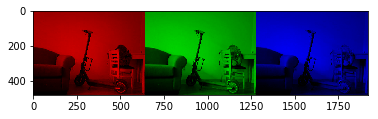

In [75]:
red_image = remove_green_and_blue(image=frame)
green_image = remove_red_and_blue(image=frame)
blue_image = remove_red_and_green(image=frame)

horizontally_stacked_image = np.hstack((frame, red_image, green_image, blue_image))

show_image(image=horizontally_stacked_image)

#### Crop and Resize Image

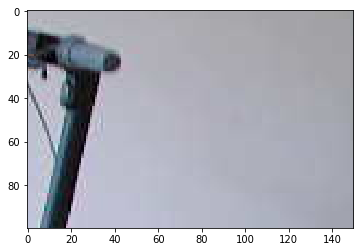

In [76]:
cropped_image = frame[100:200,300:450,:]

show_image(image=cropped_image)

In [ ]:
def resize(image, dimensions, scalepercent):
    """Resize an image.
    Args:
        image (numpy.ndarray): The image to resize.
        dimensions (tuple): The dimensions to resize to.
        percent (float): The percent to resize by.
    Returns:
        numpy.ndarray: The resized image.
    """
    # Resize the image.
    dim = (int(dimensions[0] * scalepercent), int(dimensions[1] * scalepercent))
    resized_image = cv2.resize(image, dimensions, interpolation=cv2.INTER_AREA)
    # Return the resized image.
    return resized_image


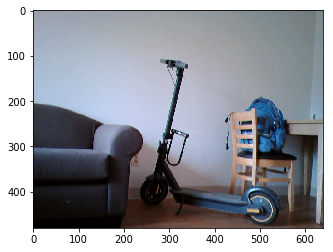

In [77]:
resized_image = resize(image=frame, dimensions=(frame_width, frame_height), scalepercent=0.5)

show_image(image=resized_image)

### Step 8: Save Photo
Using matplotlib imported earlier, we can save our image

In [78]:
imsave("frame.png", frame)

### Hackathon Ideas using Camera

1. Take pictures of different soil types and label unique characteristics of each type of soil using different filters.
2. Take pictures of different plants and soil types, label the characteristics of each plant and soil type that enables growth. Some soils are better for certain plants, use the camera to find the pattern.
3. Analyze the water level by constantly taking pictures of the water level and comparing the current level to the previous level.
